In [185]:
import logging
logging.basicConfig(
    level=logging.DEBUG, 
    format='%(asctime)s,%(msecs)d %(levelname)-8s [%(lineno)d] %(message)s')

import numpy as np
from sklearn.cluster.bicluster import SpectralCoclustering, SpectralBiclustering
from sklearn.metrics import consensus_score
import pandas as pd

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 20)
from matplotlib import ticker

Populating the interactive namespace from numpy and matplotlib


In [7]:
freq_prev_verb = pd.read_csv('/home/makrai/repo/hungarian_verbal_complex/freqPrevFin.txt', sep=' ', header=None, 
                             names=['freq', 'prev_verb'])

In [8]:
freq_prev_verb.head()


,freq,prev_verb
0,292019,el+mond
1,145257,el+fogad
2,141467,ki+derül
3,124530,meg+jelenik
4,104184,hozzá+tesz


In [15]:
freq_prev_verb['prev'], freq_prev_verb['verb'] = zip(*freq_prev_verb.prev_verb.str.split('+', n=1))

In [17]:
freq_prev_verb.head()

,freq,prev_verb,prev,verb
0,292019,el+mond,el,mond
1,145257,el+fogad,el,fogad
2,141467,ki+derül,ki,derül
3,124530,meg+jelenik,meg,jelenik
4,104184,hozzá+tesz,hozzá,tesz


In [101]:
marg = [None, None]
index = [None, None]
for i, mode in enumerate(['prev', 'verb']):
    marg[i] = freq_prev_verb.groupby(mode).sum().sort_values(by='freq', ascending=False)
    index[i] = {morph: i for i, morph in enumerate(marg[i].index)}

In [243]:
mx = np.zeros((len(marg[0]), len(marg[1])))
for _, record in freq_prev_verb.iterrows():
    freq_str, _, prev, verb = record
    mx[index[0][prev], index[1][verb]] = int(freq_str)

In [217]:
# Mutual information
mx /= marg[0]
mx /= marg[1].T

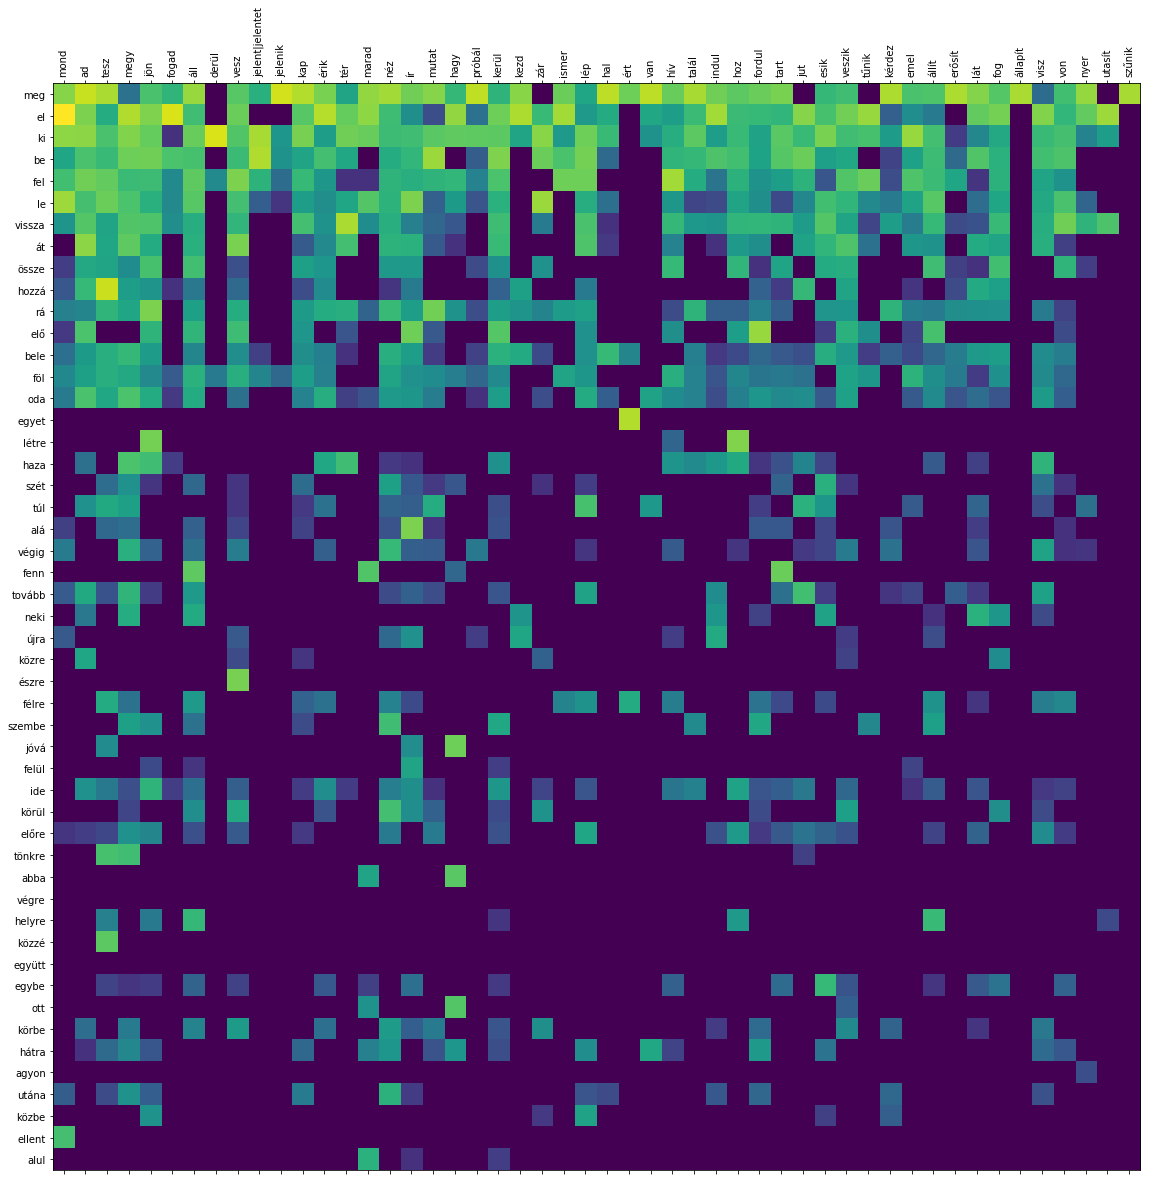

In [236]:
def show_most_freq(x_limit, y_limit):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(np.log(mx[:x_limit,:50]+1))#, interpolation='nearest')
    #fig.colorbar(cax)
    ax.set_xticklabels([''] + marg[1].index)
    ax.set_yticklabels([''] + marg[0].index)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.set_xticks(np.arange(x_limit))
    ax.set_yticks(np.arange(y_limit))
    #ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    
show_most_freq(50, 50)

In [244]:
sub_mx = mx[:100,:100]
clusser = SpectralCoclustering(n_jobs=-1)
clusser.fit(sub_mx)
#score = consensus_score(clusser.biclusters_,(rows[:, row_idx], columns[:, col_idx]))
#print("consensus score: {:.3f}".format(score))

fit_data = sub_mx[np.argsort(clusser.row_labels_)]
fit_data = fit_data[:, np.argsort(clusser.column_labels_)]

plt.matshow(fit_data, cmap=plt.cm.Blues)#, aspect='auto')
plt.show()

/home/makrai/tool/python/venv3/lib/python3.4/site-packages/sklearn/cluster/bicluster.py:38: RuntimeWarning: divide by zero encountered in true_divide
  row_diag = np.asarray(1.0 / np.sqrt(X.sum(axis=1))).squeeze()
/home/makrai/tool/python/venv3/lib/python3.4/site-packages/sklearn/cluster/bicluster.py:48: RuntimeWarning: invalid value encountered in multiply
  an = row_diag[:, np.newaxis] * X * col_diag


ValueError: array must not contain infs or NaNs

In [245]:
SpectralBiclustering

sklearn.cluster.bicluster.SpectralBiclustering